In [11]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from oscar.compressed_sensing import cal_recon_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fig. 6, Reconstruction error on Google Sycamore

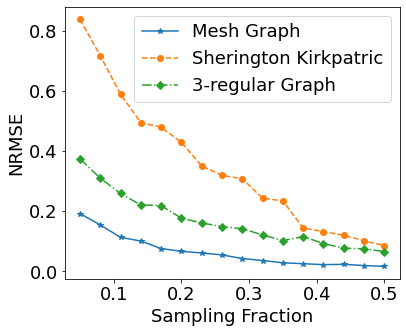

In [12]:

def plot_recon_error_vs_sf(sfs, recon_path_dict):
    # vary sampling fractions
    # origin = np.load("google_grid.npz", allow_pickle=True)['energies']['mitis']
    
    # print(np.array(origin))
    # origin = np.array(origin)
    # print
    data_types = ['grid', 'sk', '3reg']

    formal_label = {'grid': "Mesh Graph", "sk": "Sherington Kirkpatric", "3reg": "3-regular Graph"}
    # sfs = np.arange(0.05, 0.3, 0.02)
    
    recon_es = {label: [] for label in data_types}

    for label in data_types:
        # data = np.load(f"recons_{label}.npz", allow_pickle=True)
        data = np.load(recon_path_dict[label], allow_pickle=True)
        recons = data['recons'].tolist()
        origin = data['origin']

        # residual_type = 'CONV'
        # residual_type = 'CROSS_CORRELATION'
        # residual_type = 'ZNCC'
        residual_type = 'NRMSE'

        for i, sf in enumerate(sfs):
            recon_e = cal_recon_error(origin.reshape(-1), recons[i]['unmitis'].reshape(-1), residual_type)


            # print(recon_e)
            # for label, error in recon_e.items():
            #     # print(error)
            #     recon_es[label].append(error)
            recon_es[label].append(recon_e)

    fig, axs = plt.subplots()
    cnt = 0
    markers = ['*', 'o', 'D']
    linestyles = ["-", "--", "-."]
    for label, errors in recon_es.items():
        plt.plot(sfs, errors, marker=markers[cnt], label=formal_label[label], ls=linestyles[cnt])
        cnt += 1
    # for error in recon_es:
    # axs.plot(sfs, recon_es, marker='o', label="grid")
        
    axs.legend()
    axs.set_xlabel('Sampling Fraction')
    axs.set_ylabel(f'{residual_type}')
    # axs.set_title(f'econstruction error v.s. sampling fraction')
    plt.savefig("../paper_figs/google_recon_error.pdf", dpi=1000, bbox_inches='tight')
    plt.show()

# importlib_reload('QAOAKit.compressed_sensing')
sfs = np.arange(0.05, 0.5, 0.03)
recon_path_dict = {
    'grid': "2022-10-03_15:19:01/recons_grid.npz",
    "3reg": "2022-10-03_14:56:35/recons_3reg.npz",
    "sk": "2022-10-03_15:12:19/recons_sk.npz"
}

params = {'legend.fontsize': 18,
          'figure.figsize': (6, 5),
         'axes.labelsize': 18, #'x-large',
         'axes.titlesize': 20, #'x-large',
         'xtick.labelsize': 18,
         'ytick.labelsize': 18}
plt.rcParams.update(params)
plot_recon_error_vs_sf(sfs, recon_path_dict)

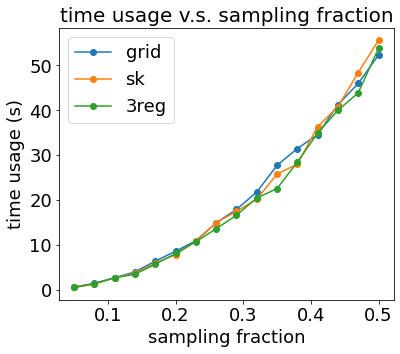

In [13]:

# sk = [0.530087, 1.365803, 4.032805, 6.149849, 10.513856, 13.533538, 16.164777, 21.576201,
#      27.124903, 31.313417, 36.446754, 43.309781, 46.781164, 52.409669]

sk = [0.527959, 1.289736, 2.682810, 3.690074, 5.956879, 7.842423, 10.805631, 14.978684,
     17.479327, 20.194243, 25.795569, 28.007915, 36.369922, 40.813939, 48.430299, 55.603489]
reg3 = [0.523730, 1.353509, 2.684634, 3.460168, 5.727766, 8.093807, 10.742766, 13.610563,
        16.635020, 20.461509, 22.566001, 28.463700, 34.931336, 40.025472, 43.898739, 53.869708]
grid = [0.593889, 1.446632, 2.713165, 3.983761, 6.402422, 8.595048, 10.953025, 14.935868,
        17.918882, 21.795427, 27.755789, 31.487459, 34.603668, 41.274977, 45.992941, 52.334438]

times_dict = {
    'grid': grid,
    'sk': sk,
    '3reg': reg3
}

def plot_time_vs_sf(sfs, times_dict: dict):
    # vary sampling fractions
    # origin = np.load("google_grid.npz", allow_pickle=True)['energies']['mitis']
    
    # print(np.array(origin))
    # origin = np.array(origin)
    # print
    # data_types = ['grid', 'sk', '3reg']
    # data_types = ['sk', '3reg']
    data_types = ['grid']

    # times_dict = {label: [] for label in data_types}

    # for label in data_types:
    #     data = np.load(f"recons_{label}.npz", allow_pickle=True)
    #     times = data['times']
    #     times_dict[label] = times
        # print(times)
        # times_dict[label] = [3.751044, 6.445278, 8.232543, 11.408934, 14.483946, 16.760700, 21.696105, 24.282870, 31.776780, 35.406588, 40.742857, 48.742751, 53.380392]
    fig, axs = plt.subplots()
    for label, errors in times_dict.items():
        axs.plot(sfs, times_dict[label], marker='o', label=label)
    # for error in recon_es:
    # axs.plot(sfs, recon_es, marker='o', label="grid")
        
    axs.legend()
    axs.set_xlabel('sampling fraction')
    axs.set_ylabel(f'time usage (s)')
    axs.set_title(f'time usage v.s. sampling fraction')
    plt.savefig("../paper_figs/time_vs_sf.png", dpi=200, bbox_inches='tight')
    plt.show()

# importlib_reload('QAOAKit.compressed_sensing')
plot_time_vs_sf(sfs, times_dict)

# Fig. 5, Original experimental and reconstructed QAOA landscapes for MaxCut problem with mesh graph and 3-regular graph, and SK Model problem.

16
0.41


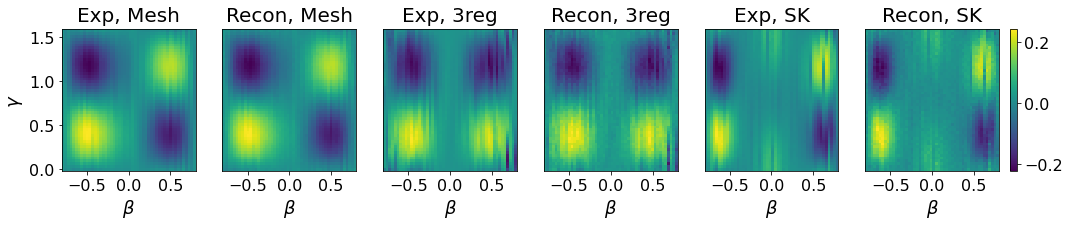

In [14]:
def _vis_p1_recon_google_data(
        origin_dict,
        recon_dict,
        # gamma_range,
        # beta_range,
        # C_opt, bound, var_opt,
        bounds,
        full_range,
        true_optima,
        # mitis_recon,
        # unmitis_recon,
        # ideal_recon,
        # xlabel,
        title,
        save_path,
        title_y,
        recon_params_path_dict=None,
        origin_params_path_dict=None,
    ):

    
    # plt.figure
    # plt.rc('font', size=28)
    # plt.rc('axes.facecolor', 'snow')
    # rcParams['axes.facecolor'] = 'white'
    fig, axs = plt.subplots(nrows=1, ncols=6) #, figsize=(15, 20))
    fig.patch.set_facecolor('white')
    # fig.suptitle(title, y=0.92)
    axs = axs.reshape(-1)

    # TODO Check ij and xy
    X, Y = np.meshgrid(full_range['beta'], full_range['gamma'])

    # c = ax.pcolormesh(X, Y, Z, cmap='viridis', vmin=Z.min(), vmax=Z.max())
    idx = 0
    formal_labels = {'grid': 'Mesh', "3reg": "3reg", "sk": "SK"}
    for label, origin in origin_dict.items():
        recon = recon_dict[label]
        # axs[idx]
        # Z = np.array(Z).T
        # c = axs[idx].pcolormesh(X, Y, Z, cmap='viridis', vmin=Z.min(), vmax=Z.max())
        
        # im = axs[idx].imshow(origin)
        im = axs[idx].pcolormesh(X, Y, origin) #, cmap='viridis', vmin=origin.min(), vmax=origin.max())
        axs[idx].set_title(f"Exp, {formal_labels[label]}", y=title_y)
        if idx == 0:
            axs[idx].set_ylabel(r'$\gamma$')
        else:
            axs[idx].set_yticks([])
        axs[idx].set_xlabel(r'$\beta$') 
        if true_optima:
            axs[idx].plot(true_optima[1], true_optima[0], marker="o", color='red', markersize=7, label="true optima")
        
        # if idx >= 4:
        #     axs[idx].set_xlabel('beta')
        # else:
        #     axs[idx].set_xticks([])


        # axs[idx].set_xticks([])
        # axs[idx].set_yticks([])
        # axs[idx].set_xlim(bottom=full_range['beta'][0], top=full_range['beta'][-1])
        # axs[idx].set_xlim(left=bounds['beta'][0], right=bounds['beta'][1])
        # axs[idx].set_ylim(bottom=bounds['gamma'][0], top=bounds['gamma'][1])

        # im = axs[idx + 3].imshow(recon)
        recon_idx = idx + 1
        im = axs[recon_idx].pcolormesh(X, Y, recon)
        axs[recon_idx].set_title(f"Recon, {formal_labels[label]}", y=title_y)
        axs[recon_idx].set_yticks([])
        axs[recon_idx].set_xlabel(r'$\beta$') 
        if true_optima:
            axs[recon_idx].plot(true_optima[1], true_optima[0], marker="o", color='red', markersize=7, label="true optima")

        # axs[idx + 1].set_ylabel('gamma')
        # axs[idx + 3].set_xlim(left=bounds['beta'][0], right=bounds['beta'][1])
        # axs[idx + 3].set_ylim(bottom=bounds['gamma'][0], top=bounds['gamma'][1])

        # origin
        if origin_params_path_dict and label in origin_params_path_dict:
            xs = [] # beta
            ys = [] # gamma
            for param in origin_params_path_dict[label]:
                xs.append(param[1])
                ys.append(param[0])

            axs[idx].plot(xs, ys, marker="o", color='purple', markersize=5, label="optimization path")
            axs[idx].plot(xs[0], ys[0], marker="o", color='white', markersize=9, label="initial point")
            axs[idx].plot(xs[-1], ys[-1], marker="s", color='white', markersize=12, label="last point")

        # recon
        if recon_params_path_dict and label in recon_params_path_dict:
            xs = [] # beta
            ys = [] # gamma
            for param in recon_params_path_dict[label]:
                xs.append(param[1])
                ys.append(param[0])

            axs[idx + 1].plot(xs, ys, marker="o", color='purple', markersize=5, label="optimization path")
            axs[idx + 1].plot(xs[0], ys[0], marker="o", color='white', markersize=9, label="initial point")
            axs[idx + 1].plot(xs[-1], ys[-1], marker="s", color='white', markersize=12, label="last point")
        
        
        idx += 2

        
    # plt.legend()
    # fig.colorbar(im, ax=[axs[i] for i in range(6)], pad=0.01)
    fig.colorbar(im, ax=[axs[i] for i in range(6)], pad=0.01)
    # plt.title(title)
    # plt.subtitle(title)
    # fig.savefig(save_path, dpi=600, bbox_inches='tight')
    # fig.tight_layout()
    fig.savefig(save_path, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close('all')


labels = ['grid', '3reg', 'sk']
recon_path_dict = {
    'grid': "2022-10-03_15:19:01/recons_grid.npz",
    "3reg": "2022-10-03_14:56:35/recons_3reg.npz",
    "sk": "2022-10-03_15:12:19/recons_sk.npz"
}
origin_dict = {}
recon_dict = {}
# sfs = np.arange(0.05, 0.3, 0.02)
sfs = np.arange(0.05, 0.5, 0.03)
print(len(sfs))
idx = -7
# sf = sfs[idx]
sf = 0.410
print(sf)

def get_bounds():
    data_path = f"./Google_Data/google_sk.npz"

    data = np.load(data_path, allow_pickle=True)

    # betas = data['betas']
    # gammas = data['gammas']
    # energies = data['energies']
    bounds = data['bounds'].tolist()
    return bounds

for label in labels:
    # data = np.load(f"recons_{label}.npz", allow_pickle=True)
    data = np.load(recon_path_dict[label], allow_pickle=True)
    recons = data['recons'].tolist()
    recon = recons[idx]['unmitis']
    # bounds = data['bounds']
    origin = data['origin']

    origin_dict[label] = origin
    recon_dict[label] = recon

bounds = get_bounds()
full_range = {
    "beta": np.linspace(bounds['beta'][0], 
        bounds['beta'][1],
        origin.shape[1]),
    "gamma": np.linspace(bounds['gamma'][0], bounds['gamma'][1], origin.shape[0]),
}

params = {'legend.fontsize': 10,
          'figure.figsize': (20, 2.6),
         'axes.labelsize': 18, #'x-large',
         'axes.titlesize': 20, #'x-large',
         'xtick.labelsize': 16,
         'ytick.labelsize': 16}
plt.rcParams.update(params)


figdir = './google_data'
_vis_p1_recon_google_data(
    origin_dict=origin_dict,
    recon_dict=recon_dict,
    full_range=full_range,
    bounds=None,
    true_optima=None,
    title=f'Google Data, sampling fraction: {sf:.3f}',
    save_path=f'../paper_figs/google_data_sf{sf:.3f}.pdf',
    title_y=1.015
)

# Print 3 reg landscapes only (subfigure 3, 4 above) for APS March presentation.

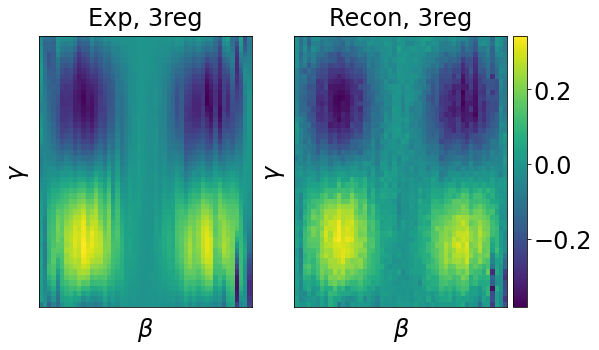

In [15]:
def _vis_p1_recon_google_data(
        origin_dict,
        recon_dict,
        # gamma_range,
        # beta_range,
        # C_opt, bound, var_opt,
        bounds,
        full_range,
        true_optima,
        # mitis_recon,
        # unmitis_recon,
        # ideal_recon,
        # xlabel,
        title,
        save_path,
        title_y,
        recon_params_path_dict=None,
        origin_params_path_dict=None,
    ):
 
    n = 2
    fig, axs = plt.subplots(nrows=1, ncols=n) #, figsize=(15, 20))
    fig.patch.set_facecolor('white')
    # fig.suptitle(title, y=0.92)
    axs = axs.reshape(-1)

    # TODO Check ij and xy
    X, Y = np.meshgrid(full_range['beta'], full_range['gamma'])

    # c = ax.pcolormesh(X, Y, Z, cmap='viridis', vmin=Z.min(), vmax=Z.max())
    idx = 0
    formal_labels = {'grid': 'Mesh', "3reg": "3reg", "sk": "SK"}
    for label, origin in origin_dict.items():
        recon = recon_dict[label]
        # axs[idx]
        # Z = np.array(Z).T
        # c = axs[idx].pcolormesh(X, Y, Z, cmap='viridis', vmin=Z.min(), vmax=Z.max())
        
        # im = axs[idx].imshow(origin)
        im = axs[idx].pcolormesh(X, Y, origin) #, cmap='viridis', vmin=origin.min(), vmax=origin.max())
        axs[idx].set_title(f"Exp, {formal_labels[label]}", y=title_y)
        if idx == 0:
            axs[idx].set_ylabel(r'$\gamma$')
        else:
            axs[idx].set_yticks([])
        axs[idx].set_yticks([])
        axs[idx].set_xticks([])
        axs[idx].set_xlabel(r'$\beta$') 
        if true_optima:
            axs[idx].plot(true_optima[1], true_optima[0], marker="o", color='red', markersize=7, label="true optima")
        
        # im = axs[idx + 3].imshow(recon)
        recon_idx = idx + 1
        im = axs[recon_idx].pcolormesh(X, Y, recon)
        axs[recon_idx].set_title(f"Recon, {formal_labels[label]}", y=title_y)
        axs[recon_idx].set_yticks([])
        axs[recon_idx].set_xticks([])
        axs[recon_idx].set_xlabel(r'$\beta$')
        axs[recon_idx].set_ylabel(r'$\gamma$')
        if true_optima:
            axs[recon_idx].plot(true_optima[1], true_optima[0], marker="o", color='red', markersize=7, label="true optima")
 
        idx += 2

        
    # plt.legend()
    # fig.colorbar(im, ax=[axs[i] for i in range(6)], pad=0.01)
    fig.colorbar(im, ax=[axs[i] for i in range(n)], pad=0.01)
    # plt.title(title)
    # plt.subtitle(title)
    # fig.savefig(save_path, dpi=600, bbox_inches='tight')
    # fig.tight_layout()
    fig.savefig(save_path, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close('all')


# labels = ['grid', '3reg', 'sk']
labels = ['3reg']
recon_path_dict = {
    'grid': "2022-10-03_15:19:01/recons_grid.npz",
    "3reg": "2022-10-03_14:56:35/recons_3reg.npz",
    "sk": "2022-10-03_15:12:19/recons_sk.npz"
}
origin_dict = {}
recon_dict = {}
sfs = np.arange(0.05, 0.3, 0.02)
idx = -9
# sf = sfs[idx]
sf = sfs[idx]
# print(sf)

def get_bounds():
    data_path = f"./Google_Data/google_sk.npz"

    data = np.load(data_path, allow_pickle=True)

    # betas = data['betas']
    # gammas = data['gammas']
    # energies = data['energies']
    bounds = data['bounds'].tolist()
    return bounds

for label in labels:
    # data = np.load(f"recons_{label}.npz", allow_pickle=True)
    data = np.load(recon_path_dict[label], allow_pickle=True)
    recons = data['recons'].tolist()
    recon = recons[idx]['unmitis']
    # bounds = data['bounds']
    origin = data['origin']

    origin_dict[label] = origin
    recon_dict[label] = recon

bounds = get_bounds()
full_range = {
    "beta": np.linspace(bounds['beta'][0], 
        bounds['beta'][1],
        origin.shape[1]),
    "gamma": np.linspace(bounds['gamma'][0], bounds['gamma'][1], origin.shape[0]),
}

params = {'legend.fontsize': 24,
          'figure.figsize': (10, 5),
         'axes.labelsize': 24, #'x-large',
         'axes.titlesize': 24, #'x-large',
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}
plt.rcParams.update(params)


figdir = './google_data'
_vis_p1_recon_google_data(
    origin_dict=origin_dict,
    recon_dict=recon_dict,
    full_range=full_range,
    bounds=None,
    true_optima=None,
    title=f'Google Data, sampling fraction: {sf:.3f}',
    save_path=f'../paper_figs/google_data_3reg_sf{sf:.3f}.png',
    title_y=1.015
)
